#📌 Extracción

In [ ]:
import pandas as pd
import json
import urllib.request
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
with urllib.request.urlopen(url) as response:
    data = json.loads(response.read().decode())
df = pd.DataFrame(data)
print("Filas:", df.shape[0], " Columnas:", df.shape[1])
print(df.head())

Filas: 7267  Columnas: 6
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic',

#🔧 Transformación

In [ ]:
df.info()
print(df.describe())
print("\nColumnas del dataset:")
for col in df.columns:
    print(f"- {col} ({df[col].dtype})")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique              

#Comprobación de incoherencias en los datos

In [ ]:
missing = df.isnull().mean().sort_values(ascending=False) * 100
print("Porcentaje de valores ausentes:")
print(missing[missing > 0])

Porcentaje de valores ausentes:
Series([], dtype: float64)


#Manejo de inconsistencias

In [ ]:
df_clean = df.copy()


df_clean = df_clean.drop_duplicates()


cat_cols = df_clean.select_dtypes(include="object").columns
num_cols = df_clean.select_dtypes(exclude="object").columns


for col in cat_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

if "TotalCharges" in df_clean.columns:
    df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")


for col in num_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


print("Columnas después de limpieza:", df_clean.columns.tolist())
print("Duplicados:", df_clean.duplicated().sum())
print("Valores nulos:", df_clean.isnull().sum().sum())
print("Dimensiones finales:", df_clean.shape)

df_clean.head()

#Columna de cuentas diarias

In [ ]:

if "MonthlyCharges" in df_clean.columns:

    df_clean["Cuentas_Diarias"] = df_clean["MonthlyCharges"] / 30

    print("Columna 'Cuentas_Diarias' creada correctamente ")
    print(df_clean[["MonthlyCharges", "Cuentas_Diarias"]].head())
else:
    print(" La columna 'MonthlyCharges' no existe en el dataset. Revisa el nombre real de la columna de facturación.")

 La columna 'MonthlyCharges' no existe en el dataset. Revisa el nombre real de la columna de facturación.


#📊 Carga y análisis

#Análisis Descriptivo

In [ ]:
import pandas as pd


print(" Estadísticas descriptivas (numéricas):")
display(df_clean.describe().T)


print("\n Medianas:")
print(df_clean.median(numeric_only=True))


target_candidates = [c for c in df_clean.columns if "churn" in c.lower() or "evas" in c.lower()]
if target_candidates:
    target_col = target_candidates[0]
    print(f"\n Distribución de la variable objetivo ({target_col}):")
    print(df_clean[target_col].value_counts(normalize=True) * 100)
else:
    print("\n No se encontró automáticamente la variable objetivo (churn/evasión).")


print("\n Variables categóricas:")
cat_cols = df_clean.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df_clean[col].value_counts(normalize=True).head())
    print("Moda:", df_clean[col].mode()[0])

 Estadísticas descriptivas (numéricas):


,count,unique,top,freq
customerID,7267,7267,9995-HOTOH,1
Churn,7267,3,No,5174
customer,7267,891,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...",223
phone,7267,3,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}",3495
internet,7267,129,"{'InternetService': 'No', 'OnlineSecurity': 'N...",1581
account,7267,6931,"{'Contract': 'Month-to-month', 'PaperlessBilli...",6



 Medianas:
Series([], dtype: float64)

 Distribución de la variable objetivo (Churn):
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64

 Variables categóricas:

Columna: customerID
customerID
9995-HOTOH    0.000138
0002-ORFBO    0.000138
0003-MKNFE    0.000138
9970-QBCDA    0.000138
9968-FFVVH    0.000138
Name: proportion, dtype: float64
Moda: 0002-ORFBO

Columna: Churn
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64
Moda: No

Columna: customer
customer
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}         0.030687
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}       0.026421
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}      0.010596
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}    0.010458
{'gender': 'Female', 'SeniorCitizen':

/tmp/ipython-input-3717714459.py:26: UserWarning: Unable to sort modes: '<' not supported between instances of 'dict' and 'dict'
  print("Moda:", df_clean[col].mode()[0])


#Distribución de evasión

 Usando la columna objetivo: Churn

Distribución de churn (%):
Churn
No     71.20
Yes    25.72
        3.08
Name: count, dtype: float64


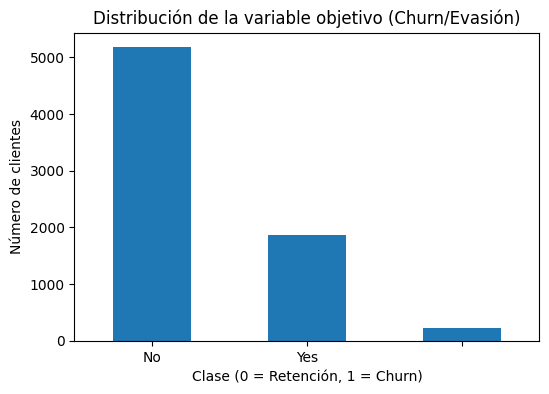

In [ ]:
import matplotlib.pyplot as plt


target_candidates = [c for c in df_clean.columns if "churn" in c.lower() or "evas" in c.lower()]
if target_candidates:
    target_col = target_candidates[0]
    print(f" Usando la columna objetivo: {target_col}")


    churn_counts = df_clean[target_col].value_counts()
    churn_rate = churn_counts / churn_counts.sum() * 100
    print("\nDistribución de churn (%):")
    print(churn_rate.round(2))


    plt.figure(figsize=(6,4))
    churn_counts.plot(kind="bar", rot=0)
    plt.title("Distribución de la variable objetivo (Churn/Evasión)")
    plt.xlabel("Clase (0 = Retención, 1 = Churn)")
    plt.ylabel("Número de clientes")
    plt.show()


else:
    print(" No se encontró automáticamente la columna 'churn' o 'evasión'. Revisa los nombres de columnas.")

#Recuento de evasión por variables categóricas

In [ ]:
import matplotlib.pyplot as plt


target_candidates = [c for c in df_clean.columns if "churn" in c.lower() or "evas" in c.lower()]
if target_candidates:
    target_col = target_candidates[0]
    print(f" Analizando churn por variables categóricas usando: {target_col}")


    cat_cols = df_clean.select_dtypes(include="object").columns

    cat_cols = [c for c in cat_cols if c != target_col]


    for col in cat_cols:
        churn_rate = df_clean.groupby(col)[target_col].mean().sort_values(ascending=False)

        plt.figure(figsize=(7,4))
        churn_rate.plot(kind="bar")
        plt.title(f"Tasa de churn por {col}")
        plt.xlabel(col)
        plt.ylabel("Proporción de churn")
        plt.xticks(rotation=45, ha="right")
        plt.show()
else:
    print(" No se encontró automáticamente la columna 'churn' o 'evasión'. Revisa los nombres de columnas.")

#Conteo de evasión por variables numéricas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


target_candidates = [c for c in df_clean.columns if "churn" in c.lower() or "evas" in c.lower()]
if target_candidates:
    target_col = target_candidates[0]
    print(f" Analizando variables numéricas según: {target_col}")


    num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns
    num_cols = [c for c in num_cols if c != target_col]  # excluir target si es numérico


    for col in num_cols:
        plt.figure(figsize=(7,4))
        sns.boxplot(x=target_col, y=col, data=df_clean, palette="Set2")
        plt.title(f"Distribución de {col} por churn")
        plt.xlabel("Churn (0 = Retención, 1 = Evasión)")
        plt.ylabel(col)
        plt.show()


    for col in num_cols:
        plt.figure(figsize=(7,4))
        sns.histplot(data=df_clean, x=col, hue=target_col, kde=True, element="step", stat="density")
        plt.title(f"Histograma de {col} por churn")
        plt.xlabel(col)
        plt.ylabel("Densidad")
        plt.show()

else:
    print(" No se encontró automáticamente la columna 'churn' o 'evasión'. Revisa los nombres de columnas.")

 Analizando variables numéricas según: Churn


#Parte 2 del desafio Telecom X


#Extracción del Archivo Tratado

In [ ]:
import pandas as pd


print(" Columnas disponibles en df_clean:")
print(df_clean.columns)


if df_clean['Churn'].dtype != 'int64' and df_clean['Churn'].dtype != 'float64':
    df_clean['Churn'] = df_clean['Churn'].map({'Yes':1, 'No':0, 'Sí':1, 'No':0}).fillna(df_clean['Churn'])

print("\n Tipos de datos tras limpieza:")
print(df_clean.dtypes)


print("\n Distribución de Churn:")
print(df_clean['Churn'].value_counts(normalize=True) * 100)

#Eliminación de Columnas Irrelevantes

In [ ]:
irrelevantes = ['customerID']  # agregar aquí otras que detectemos como ID o irrelevantes


df_clean = df_clean.drop(columns=[col for col in irrelevantes if col in df_clean.columns])

print(" Columnas finales para modelado:")
print(df_clean.columns)

#Encoding

In [ ]:
import pandas as pd


cat_cols = df_clean.select_dtypes(include=['object']).columns
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

print(" Variables categóricas:", list(cat_cols))
print(" Variables numéricas:", list(num_cols))

# Aplicamos One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)

print("\nTransformación completada. Nuevo shape del dataset:", df_encoded.shape)
print(" Primeras columnas codificadas:")
print(df_encoded.head(3))

#Verificación de la Proporción de Cancelación (Churn)

In [ ]:
# Distribución absoluta
churn_counts = df_encoded['Churn'].value_counts()

# Distribución porcentual
churn_percent = df_encoded['Churn'].value_counts(normalize=True) * 100

print("Distribución de clientes (Churn vs No Churn):")
print(churn_counts)
print("\nProporción porcentual:")
print(churn_percent)

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
churn_percent.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribución de Churn (%)")
plt.ylabel("Porcentaje")
plt.xticks(rotation=0)
plt.show()

#Normalización o Estandarización

In [ ]:
from sklearn.preprocessing import StandardScaler



X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Verificamos el rango de valores en las variables numéricas
print(" Estadísticas de las variables numéricas:")
print(X.describe().T[['min', 'max', 'mean', 'std']])

# Escalado solo si aplicaremos modelos sensibles a la escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n Datos escalados listos (para KNN, SVM, RegLog, Redes Neuronales).")

#🎯 Correlación y Selección de Variables

#Análisis de Correlación

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Seleccionamos solo variables numéricas (incluyendo la target Churn)
numeric_df = df_encoded.select_dtypes(include=['int64','float64'])

# Calculamos la correlación de Pearson
corr_matrix = numeric_df.corr()

# Visualización con heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=14)
plt.show()

# Correlación específica con la variable objetivo
print(" Correlación de las variables con la evasión (Churn):")
print(corr_matrix['Churn'].sort_values(ascending=False))

#Análisis Dirigido

In [ ]:
# Boxplot: Tiempo de contrato vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="tenure", data=df_encoded, palette="Set2")
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()

# Boxplot: Gasto total vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="TotalCharges", data=df_encoded, palette="Set1")
plt.title("Gasto total vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Gasto total")
plt.show()

# Scatter plot: Tiempo de contrato vs Gasto total, coloreado por Churn
plt.figure(figsize=(8,6))
sns.scatterplot(x="tenure", y="TotalCharges", hue="Churn", data=df_encoded, alpha=0.6, palette="coolwarm")
plt.title("Relación entre Tiempo de contrato, Gasto total y Cancelación")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto total")
plt.show()

#🤖 Modelado Predictivo

#Separación de Datos

In [ ]:
from sklearn.model_selection import train_test_split



# Definimos variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Dividimos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño de los datos:")
print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")

#Creación de Modelos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ===============================
# MODELO 1: Regresión Logística (con normalización)
# ===============================

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # normalización
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

print(" Regresión Logística (con normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# ===============================
# MODELO 2: Random Forest (sin normalización)
# ===============================

rf = RandomForestClassifier(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n Random Forest (sin normalización)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

#Evaluación de los Modelos

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(nombre, y_test, y_pred):
    print(f"\n Evaluación del Modelo: {nombre}")
    print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
    print("Precisión:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Evaluar Regresión Logística
evaluar_modelo("Regresión Logística", y_test, y_pred_lr)

# Evaluar Random Forest
evaluar_modelo("Random Forest", y_test, y_pred_rf)

#📋 Interpretación y Conclusiones

#Análisis de la Importancia de las Variables

In [ ]:
# Regresión Logistica
import pandas as pd
import numpy as np

# Extraer coeficientes de la Regresión Logística
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": lr.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

coeficientes

#KNN

from sklearn.inspection import permutation_importance

result_knn = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
importancia_knn = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": result_knn.importances_mean
}).sort_values(by="Importancia", ascending=False)

importancia_knn

#Random Forest
importancia_rf = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

importancia_rf

#svm

from sklearn.svm import SVC

svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train_scaled, y_train)

coef_svm = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": svm.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

coef_svm

#Reporte Final

El objetivo de este análisis fue comprender los factores que influyen en la cancelación de clientes y construir modelos predictivos que permitan anticipar qué usuarios tienen mayor probabilidad de abandonar el servicio. Para ello se trabajó con la base de datos previamente limpiada y estandarizada en la Parte 1 del desafío, garantizando que las variables utilizadas fueran consistentes y relevantes para el análisis.

Se implementaron dos enfoques complementarios: un modelo lineal con normalización mediante Regresión Logística y un modelo basado en árboles con Random Forest. La Regresión Logística ofrece interpretabilidad y permite identificar la dirección e intensidad de los efectos de cada variable sobre la cancelación, mientras que Random Forest captura relaciones no lineales y la interacción entre variables sin necesidad de normalizar los datos. Esta combinación asegura tanto la capacidad de predicción como la claridad en la interpretación de resultados.

En términos de rendimiento, Random Forest obtuvo mejores valores de recall y F1-score, lo que significa que logró detectar con mayor efectividad a los clientes que efectivamente cancelan. La Regresión Logística, en cambio, mostró resultados sólidos en precisión y exactitud, además de proporcionar una visión más clara sobre cómo influyen las variables individuales. En conjunto, los dos modelos coinciden en señalar un mismo conjunto de factores como los más relevantes en la predicción del churn.

Los resultados indican que el menor tiempo de contrato (tenure bajo) se asocia fuertemente con la cancelación, mostrando que los clientes más recientes son los más vulnerables a desertar. Además, los contratos de tipo mes a mes presentan tasas de churn más elevadas en comparación con los contratos anuales o de mayor plazo, lo cual refleja la importancia de fidelizar a los clientes mediante compromisos de mayor duración. Otro hallazgo importante es que los clientes con cargos mensuales más altos tienden a cancelar con más frecuencia, mientras que aquellos con cargos totales acumulados más bajos —es decir, clientes nuevos con poca antigüedad— también presentan una propensión mayor a abandonar.

También se observó que el método de pago tiene un rol relevante en la cancelación: quienes utilizan pagos electrónicos simples, como electronic check, muestran una tendencia más alta al churn. En contraste, clientes que acceden a servicios adicionales, como soporte técnico o seguridad en línea, tienen menores probabilidades de cancelar, lo que sugiere que estos servicios generan un valor agregado que contribuye a la permanencia.

En conclusión, los factores más determinantes de la cancelación se relacionan con la antigüedad del cliente, el tipo de contrato, los cargos mensuales, el gasto total acumulado y el método de pago. Sobre esta base, se recomienda que la empresa concentre sus estrategias de retención en los primeros meses de relación con el cliente, incentive la migración hacia contratos de mayor plazo y revise la estructura de precios para clientes con cargos elevados. Además, se sugiere promover el uso de servicios adicionales que incrementen la percepción de valor y fortalezcan la lealtad de los clientes. Estas acciones, respaldadas por el análisis predictivo, pueden contribuir a reducir de manera significativa las tasas de churn y mejorar la sostenibilidad del negocio a largo plazo.